# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
import os
import sys
import json
import datetime
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab  
import pywt as pw
import pyecharts
from pyecharts import Line,Overlap,Grid
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column, row
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

# 数据预处理
Do work here

## 数据规范

In [2]:
def read_txt(filename):
    A = []
    with open(filename) as f:   
        for line in f:
            line=line.strip('\n')                        
            lines=line.split(",")            
            lines.insert(0,lines[0]+'+'+lines[1])
            del lines[1:5]
            A.append(lines)
    A.reverse()
    A1 = pd.DataFrame(A)
    A1.columns = list(A1.iloc[-1])
    A1.drop(axis=0, index=len(A)-1, inplace=True)
    return A1

In [3]:
my_1 = [str(element) for element in range(1,301)]
my_0 = ['0.00' for _ in range(300)]
my_Meters = [my_1[i]+'+'+my_0[i] for i in range(0,300)]

In [35]:
file = os.getcwd()

In [4]:
data_first = read_txt(file + '\\20170110.txt') 
column = data_first.columns.values.tolist()
data_first.dtypes

里程+Meters    object
左高程(mm)      object
右高程(mm)      object
dtype: object

In [5]:
data_first = data_first.apply(pd.to_numeric, errors='ignore')
data_first.dtypes

里程+Meters     object
左高程(mm)      float64
右高程(mm)      float64
dtype: object

In [6]:
data_first.head()

,里程+Meters,左高程(mm),右高程(mm)
0,98+0.00,0.19,0.50
1,98+0.25,0.28,0.54
2,98+0.50,0.37,0.47
3,98+0.75,0.28,0.37
4,98+1.00,0.23,0.27


In [7]:
data_second = read_txt(file + '\\20170213.txt')
data_second = data_second.apply(pd.to_numeric, errors='ignore')

In [8]:
data_second.head()

,里程+Meters,左高程(mm),右高程(mm)
0,97+900.00,0.62,0.17
1,97+900.25,0.56,0.17
2,97+900.50,0.54,0.12
3,97+900.75,0.52,0.02
4,97+901.00,0.45,-0.05


## 原始时域波形

In [9]:
subset_Z = data_first[data_first['里程+Meters'].between('98+0.00', '99+999.75')]
subset_Z.index = pd.Series(np.arange(subset_Z.shape[0]))
subset_Y = data_second[data_second['里程+Meters'].between('98+0.00', '99+999.75')]
subset_Y.index = pd.Series(np.arange(subset_Y.shape[0]))

In [10]:
data_z = pd.concat([subset_Z['左高程(mm)'],subset_Y['左高程(mm)']],axis=1)
data_z.columns = ['JanL','FebL']
data_z.index = subset_Z['里程+Meters']
data_y = pd.concat([subset_Z['右高程(mm)'],subset_Y['右高程(mm)']],axis=1)
data_y.columns = ['JanR','FebR']
data_y.index = subset_Y['里程+Meters']
del subset_Z,subset_Y

In [ ]:
line1 = Line()
line2 = Line()
line_color = ['red', 'blue']
colz = data_z.columns
coly = data_y.columns
for i in range(len(colz)):
    line1.add(colz[i].replace('L', ''),
              data_z.index,
              data_z[colz[i]],
              line_width=1.5,
              line_color = line_color[i],
              yaxis_name='左高低不平顺/mm',
              yaxis_name_gap=35,
              is_xaxis_show=False,
              is_datazoom_show=True,
              datazoom_xaxis_index=[0, 1],
              is_more_utils=True)
    line2.add(coly[i].replace('R', ''),
              data_y.index,
              data_y[coly[i]],
              line_width=1.5,
              line_color = line_color[i],
              yaxis_name='右高低不平顺/mm',
              yaxis_name_gap=35,
              is_datazoom_show=True,
              datazoom_xaxis_index=[0, 1],
              is_more_utils=True)
grid = Grid(width=900, height=400)
grid.add(line1, grid_bottom="53%")
grid.add(line2, grid_top="53%")
grid

![1.png](https://i.loli.net/2020/02/05/1KTJRnFhgOEsNAl.png)

In [11]:
#左高低不平顺相关系数
data_z.corr()

,JanL,FebL
JanL,1.000000,-0.111018
FebL,-0.111018,1.000000


In [12]:
#右高低不平顺相关系数
data_y.corr()

,JanR,FebR
JanR,1.000000,-0.094528
FebR,-0.094528,1.000000


## 波形匹配

In [18]:
def SX(my_input_1,my_input_2,L,JL, D, T, Q):
    ## 核心代码暂不公开
    return z_df,val_max,val_dot

In [17]:
SX1,val_max,val_dot = SX('Jan','Feb','98+0.00',1,1200, 200, 50)

In [19]:
SX1.head()

,JanL,FebL,JanR,FebR
Mileage,,,,
98+0.00,0.19,0.33,0.50,0.75
98+0.25,0.28,0.27,0.54,0.62
98+0.50,0.37,0.29,0.47,0.56
98+0.75,0.28,0.20,0.37,0.47
98+1.00,0.23,0.24,0.27,0.48


In [20]:
SX1.dtypes

JanL    float64
FebL    float64
JanR    float64
FebR    float64
dtype: object

## 校正时域波形

In [21]:
correct_z = SX1[['JanL','FebL']]
correct_y = SX1[['JanR','FebR']]
del SX1

In [30]:
#左高低不平顺相关系数
correct_z.corr()

,JanL,FebL
JanL,1.000000,0.919095
FebL,0.919095,1.000000


In [31]:
#左高低不平顺相关系数
correct_y.corr()

,JanR,FebR
JanR,1.000000,0.876574
FebR,0.876574,1.000000


In [ ]:
line1 = Line()
line2 = Line()
line_color = ['red', 'blue']
colz = correct_z.columns
coly = correct_y.columns
for i in range(len(colz)):
    line1.add(colz[i].replace('L', ''),
              correct_z.index,
              correct_z[colz[i]],
              line_width=1.5,
              line_color = line_color[i],
              yaxis_name='左高低不平顺/mm',
              yaxis_name_gap=35,
              is_xaxis_show=False,
              is_datazoom_show=True,
              datazoom_xaxis_index=[0, 1],
              is_more_utils=True)
    line2.add(coly[i].replace('R', ''),
              correct_y.index,
              correct_y[coly[i]],
              line_width=1.5,
              line_color = line_color[i],
              yaxis_name='右高低不平顺/mm',
              yaxis_name_gap=35,
              is_datazoom_show=True,
              datazoom_xaxis_index=[0, 1],
              is_more_utils=True)
grid = Grid(width=900, height=400)
grid.add(line1, grid_bottom="53%")
grid.add(line2, grid_top="53%")
grid

![2.png](https://i.loli.net/2020/02/05/hqYwmR67cD2d1no.png)

![%E5%9B%BE1.svg](https://cl.ly/04577909b22f/download/%E5%9B%BE1.svg)

## 全线路波形偏差修正

![%E5%85%A8%E6%95%B0%E6%8D%AE.svg](https://cl.ly/3c525a51aa81/download/%E5%85%A8%E6%95%B0%E6%8D%AE.svg)

# 频谱分析


## 计算功率谱

In [22]:
def PSD(correct,num):
    psd1 = []
    for columname in correct.columns[0:correct.shape[1]]:
        p_d = [correct[columname][i] for i in range(num)]
        psd1.append(plt.psd(p_d, NFFT=512, Fs=1/0.25, Fc=0, detrend=mlab.detrend_none,window=mlab.window_hanning, 
                    noverlap=256, pad_to=None,sides='default',scale_by_freq=None))
    return psd1

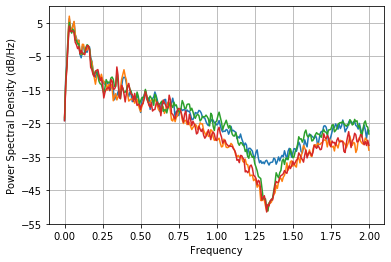

In [23]:
psd1 = PSD(correct_z,4096)
psd2 = PSD(correct_y,4096)

## 识别特征波长

In [24]:
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
])
cc = ['blue', 'red']
line_dash = ['dashed', 'solid']
c_y = ['Jan', 'Feb']
p1 = figure(plot_width=450,
            plot_height=300,
            x_axis_type="log",
            y_axis_type="log",
            x_range=(0.006, 1),
            tools=[hover, 'box_select,reset,wheel_zoom,pan'])
for i in range(len(psd1)):
    ttt1 = np.array(psd1[i]).T
    p1.line(ttt1[:, 1],
            ttt1[:, 0],
            line_width=1.5,
            line_dash=line_dash[i],
            line_color=cc[i],
            legend=c_y[i])
p1.xgrid.grid_line_color = None
p1.ygrid.grid_line_color = None
p1.yaxis.axis_label = 'left-PSD(mm²/(1/m))'
p1.yaxis.axis_label_text_font_style = "italic"
p1.xaxis.axis_label = '空间频率/(1/m)'
p1.xaxis.axis_label_text_font_style = "normal"
p1.legend.location = "bottom_left"
p1.legend.click_policy = "hide"

p2 = figure(plot_width=450,
            plot_height=300,
            x_axis_type="log",
            y_axis_type="log",
            x_range=(0.006, 1),
            tools=[hover, 'box_select,reset,wheel_zoom,pan'])
for i in range(len(psd2)):
    ttt2 = np.array(psd2[i]).T
    p2.line(ttt2[:, 1],
            ttt2[:, 0],
            line_width=1.5,
            line_dash=line_dash[i],
            line_color=cc[i],
            legend=c_y[i])
p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_color = None
p2.yaxis.axis_label = 'right-PSD(mm²/(1/m))'
p2.yaxis.axis_label_text_font_style = "italic"
p2.xaxis.axis_label = '空间频率/(1/m)'
p2.xaxis.axis_label_text_font = "times"
p2.xaxis.axis_label_text_font_style = "normal"
p2.legend.location = "bottom_left"
p2.legend.click_policy = "hide"

show(row(p1, p2))

![3.png](https://i.loli.net/2020/02/05/2JurLFqZTCdsySB.png)

![%E5%9B%BE3.svg](https://cl.ly/485504d0e92f/download/%E5%9B%BE3.svg)

# 时频分析

## 离散小波变换

小波分解后第i层对应波长区间大致为
\begin{equation*}
[λ_{s}·2^{i},λ_{s}·2^{i+1}]
(λ_{s}为采样间隔)
\end{equation*}
轨检车的采样间隔0.25m，轨检车检测波长的范围为[1.5m,120m]
***
因此本文选用小波分解的层数为8层

In [25]:
def wavelet(correct,num1,num2):
    coeffs_all = []
    for columname in correct.columns[0:correct.shape[1]]:
        coeffs = pw.wavedec(correct[columname][num1:num2], 'db4', level = 8,mode='periodization')
        coeffs_all.append(coeffs)
    return coeffs_all

In [26]:
coeffs_all_z = wavelet(correct_z,0,4096)
coeffs_all_y = wavelet(correct_y,0,4096)

## 小波重构

上述小波分解后，时间分辨率逐层降低，

为了保留时间分辨率不变，需逐层重构恢复时间分辨率，

实现对信号**由粗及精**的观察

In [27]:
def Ref(data):
    coeffs_8a = []
    for i in range(len(data)):
        coeffs_8a.append(pw.upcoef('a', data[i][0], 'db4', 8)[:4096].tolist())
    coeffs_d = []
    for j in range(len(data)):
        coeffs_d0 = []
        for i in range(1,9):
            coeffs_d0.append(pw.upcoef('d', data[j][i], 'db4', 9-i)[:4096].tolist())
        coeffs_d.append(coeffs_d0)
    return coeffs_8a,coeffs_d

In [28]:
coeffs_z_8a,coeffs_z_d = Ref(coeffs_all_z)
coeffs_y_8a,coeffs_y_d = Ref(coeffs_all_y)

In [29]:
### 仅对第4层做可视化 ###
correct_z = correct_z[0:4096]
line1 = Line()
line2 = Line()
line_color = ['red', 'blue']
colz = correct_z.columns

for i in range(len(colz)):
    line1.add(colz[i].replace('L', ''),
              correct_z.index,
              correct_z[colz[i]],
              line_width=1.5,
              line_color = line_color[i],
              yaxis_name='左高低不平顺/mm',
              yaxis_name_gap=35,
              is_xaxis_show=False,
              is_datazoom_show=True,
              datazoom_xaxis_index=[0, 1],
              is_more_utils=True)
    line2.add(colz[i].replace('L', ''),
              correct_z.index,
              coeffs_z_d[i][4],
              line_width=1.5,
              line_color = line_color[i],
              yaxis_name='D4/mm',
              yaxis_name_gap=35,
              is_datazoom_show=True,
              datazoom_xaxis_index=[0, 1],
              is_more_utils=True)
grid = Grid(width=900, height=400)
grid.add(line1, grid_bottom="53%")
grid.add(line2, grid_top="53%")
grid

![4.png](https://i.loli.net/2020/02/05/vuFLT4DRgQs83N6.png)

![%E5%9B%BE4.svg](https://cl.ly/2915d70ce2aa/download/%E5%9B%BE4.svg)

# 伤损状态定量化评估

- 从第二节的时域波形中可以明显看出7月份在[500m,600m]区间范围内存在异常波形；
- 从第三节的功率谱中可以看出该样本数据存在**6.45m**的周期性不平顺；
- 第四节中采用离散小波变换分解后得到不同频带的高频系数，

 按照波长递增顺序可依次重构出各个波段的时域波形D1-D8；
- 第四层D4对应波长区间大致为[4m,8m]，和轨道结构大致吻合；

 因此其在D4中极为显著的时频特征波形可认为是轨道故障的特征波形；
***
- 为了进一步提高动检数据的利用效率，以人工决策为辅，自动化评估为主的原则，

- 本项研究设计了高速铁路无砟轨道伤损区段自动化评估算法，建立了伤损区段结合动检数据分析的闭环系统。

   高速铁路胀板故障自动化检测与定位

   **核心代码暂不公开**

## 算例1

![6.png](https://i.loli.net/2020/02/05/YzxJn4bSBfV7pKo.png)

## 算例2

![4-16.svg](https://cl.ly/e7e6e51af390/download/4-16.svg)

## 全线路数据计算

|高铁线路|算法检测病害|现场准确病害|准确率| 
|:-------:|:------:|:------:|:------:|
|线路1上行|88处|79处|89.77%|
|线路1下行|112处|90处|80.36%|
|线路2上行|27处|26处|96.30%|
|线路2下行|34处|30处|88.23%|

# Conclusions and Next Steps
Summarize findings here

## 里程校正组件

考虑数据量庞大及波形匹配计算速度的问题，现将两大功能分开完成

先将原始数据批量完成波形匹配后，传输至MySQL数据库

![ChessUrl](https://cl.ly/ec0b8bb83c97/download/first.gif)

## 质量分析平台

将预处理后数据库中的数据进行可视化，并做时频分析，定量化评估伤损病害

![ChessUrl](https://cl.ly/5f15a182a57e/download/second.gif)